In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
try:
    plt.style.use("jupyter")
except OSerror:
    print("Using default ploting style")

\begin{equation}
    D\xi = \eta
\end{equation}

\begin{equation}
    D=\begin{bmatrix}
    h_1 & \frac{1}{2!}h_1^2\\
    h_2 & \frac{1}{2!}h_2^2\\
    \cdots & \cdots \\
    h_n & \frac{1}{2!}h_n^2\\
    \end{bmatrix}
\end{equation}

\begin{equation}
    \xi=\begin{Bmatrix}
    \phi'\\
    \phi''
    \end{Bmatrix}
\end{equation}

\begin{equation}
    \xi=\begin{Bmatrix}
    \phi_1 - \phi\\
     \phi_2- \phi\\
     \cdots \\
      \phi_n - \phi\\
    \end{Bmatrix}
\end{equation}

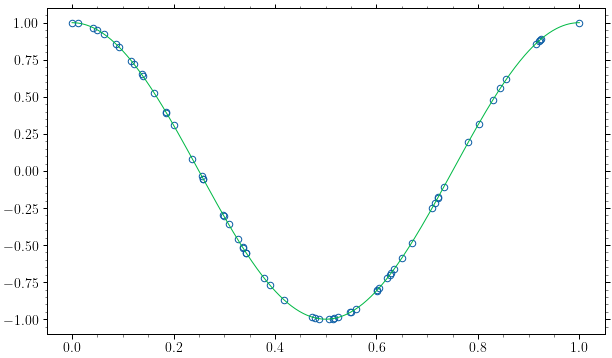

In [4]:
N = 64
x = np.sort(np.hstack([0,1,np.random.rand(N-2)]))
y = np.cos(2*np.pi*x)
plt.plot(x, y, 'o')
x_fine = np.linspace(0, 1, 512)
y_fine = np.cos(2*np.pi*x_fine)
plt.plot(x_fine, y_fine);

In [7]:
def build_D_mat(i, x):
    D = np.zeros((2, 2))
    for j in range(2):
        h = x[i+1-2*j] - x[i]
        D[j,0] = h
        D[j,1] = 0.5*h**2
    return D

In [8]:
build_D_mat(3, x)

array([[ 1.49022572e-02,  1.11038635e-04],
       [-7.81775655e-03,  3.05586587e-05]])

In [9]:
def build_eta_vec(i, f):
    eta = np.zeros(2)
    for j in range(2):
        eta[j] = f[i+1-2*j] - f[i]
    return eta

In [10]:
build_eta_vec(3, y)

array([-0.0322701 ,  0.01360235])

In [11]:
def dfdx(x, f):
    dfdx = np.zeros_like(f)
    df2dx2 = np.zeros_like(f)
    for i in range(len(f)):
        if ((i==0) or (i==len(f)-1)):
            continue
        eta = build_eta_vec(i, f)
        D = build_D_mat(i, x)
        xi = linalg.solve(D, eta)
        dfdx[i] = xi[0]
        df2dx2[i] = xi[1]
    return dfdx, df2dx2

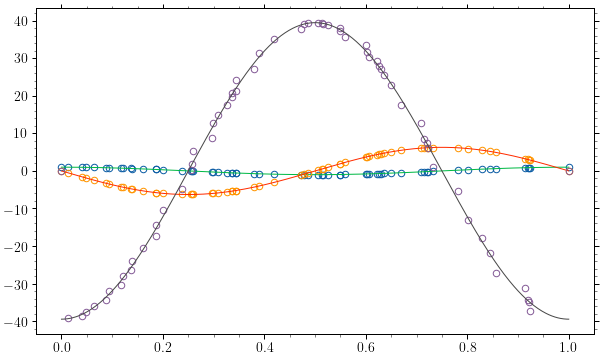

In [12]:
df, df2 = dfdx(x, y)
plt.plot(x, y, 'o')
plt.plot(x_fine, np.cos(2*np.pi*x_fine))
plt.plot(x, df, 'o')
plt.plot(x_fine, -2*np.pi*np.sin(2*np.pi*x_fine))
plt.plot(x, df2, 'o')
plt.plot(x_fine, -4*np.pi**2*np.cos(2*np.pi*x_fine));

Convergence

In [44]:
L2 = np.zeros((6,2))
res = np.array([2**j for j in range(4,10)])
for i,N in enumerate(res):
    x = np.sort(np.hstack([0,1,np.random.rand(N-2)]))
    f = np.cos(2*np.pi*x)
    df, df2 = dfdx(x, f)
    L2[i,0] = 1/N*np.sqrt(np.einsum('i->', (df+2*np.pi*np.sin(2*np.pi*x))**2))
    L2[i,1] = 1/N*np.sqrt(np.einsum('i->', (df2+4*np.pi**2*np.cos(2*np.pi*x))**2))

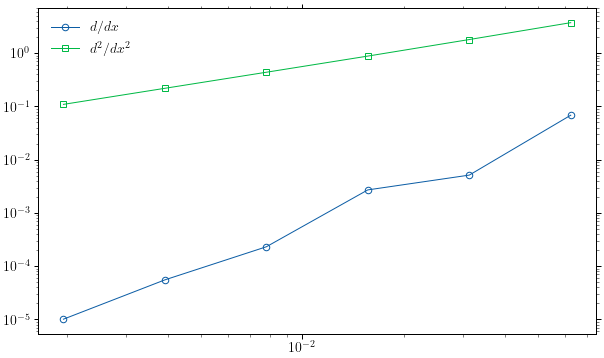

In [51]:
plt.loglog(1./res, L2[:,0], 'o-', label=r'$d/dx$')
plt.loglog(1./res, L2[:,1], 's-', label=r'$d^2/dx^2$')
plt.legend();

Second order convergence for the first derivate and first order convergence for the second derivative.